# DataQuest: Employee Exit Surveys

DataQuest Guided Project: Clean and Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

1. **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**
2. **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

In [2]:
dete = pd.read_csv("../Datasets/dete_survey.csv", parse_dates=['Cease Date', 'DETE Start Date', 'Role Start Date'], na_values=['Not Stated', 'nan', 'NaN', '-'])
tafe = pd.read_csv("../Datasets/tafe_survey.csv")

In [3]:
dete.info() # date parsing didn't work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   822 non-null    int64         
 1   SeparationType                       822 non-null    object        
 2   Cease Date                           788 non-null    datetime64[ns]
 3   DETE Start Date                      749 non-null    datetime64[ns]
 4   Role Start Date                      724 non-null    object        
 5   Position                             817 non-null    object        
 6   Classification                       455 non-null    object        
 7   Region                               717 non-null    object        
 8   Business Unit                        126 non-null    object        
 9   Employment Status                    817 non-null    object        
 10  Career move to

In [4]:
# tafe.info()
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [5]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,2012-08-01,1984-01-01,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),2012-08-01,NaT,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),2012-05-01,2011-01-01,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,2012-05-01,2005-01-01,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,2012-05-01,1970-01-01,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Notes

Important variables:

  * *Employment Length*
    * DETE: `DETE Start Date` and `Cease Date` should be used to calculate a single 'employment_duration' variable
    * TAFE: `LengthofServiceOverall. Overall Length of Service at Institute (in years)`. Also, the values given are a range, and they should be shortened to a single number in a separate column called 'employment_duration'.
  * *Age*
    * DETE: `Age`. This is given as a range and should be shortened to a single number.
    * TAFE: `CurrentAge. Current Age`. Also given as a range.
  * *Employment Cessation Reason*
    * DETE: `SeparationType`. We'll care about all 3 "Resigned" values in there.
    * TAFE: `Reason for ceasing employment`. We'll care only about the one "Resigned" category.

## Fix dates in DETE and calculate employment length

Because we'll care about the length of time of employment, we'll need the dates to be in good order. We fixed two of the DETE columns by parsing dates and creating NA types when reading in the file, but `Role Start Date` still is reading as object type data. We'll need to look into that. The TAFE data has its important date column as an integer, which is okay unless we need to compare between the two data sets.

In [7]:
dete['Role Start Date'].value_counts()

2012    65
2011    57
2010    46
2008    45
2013    41
2007    41
2009    38
2006    25
2004    22
2003    20
2000    20
2005    20
1999    19
1996    19
1989    18
1992    17
2002    16
1998    15
2001    15
1988    14
1995    13
1997    13
1990    12
1975    12
1986    11
1978     9
1976     9
1993     9
1991     8
1994     7
1979     7
1985     6
1983     5
1981     5
1987     5
1984     4
1982     4
1980     3
1970     2
1977     2
1971     1
1972     1
1973     1
200      1
1974     1
Name: Role Start Date, dtype: int64

There's a '200' value in there that doesn't make sense. Let's check that out.

In [8]:
dete.loc[dete['Role Start Date']=='200',:]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
390,391,Resignation-Other employer,2013-01-01,2000-01-01,200,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,N,N,N,Female,46-50,NaN,NaN,NaN,NaN,NaN


Only one row. Not clear whether it should be same as DETE column, as many are not, so drop it and reformat column as datetime.

In [9]:
dete.drop(index=390, inplace=True)

In [10]:
dete.loc[dete['Role Start Date']=='200',:]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB


In [11]:
dete['Role Start Date'] = pd.to_datetime(dete['Role Start Date'])

## Check values range of employment start and cessation

In [12]:
dete['Role Start Date'].value_counts().sort_index()

1970-01-01     2
1971-01-01     1
1972-01-01     1
1973-01-01     1
1974-01-01     1
1975-01-01    12
1976-01-01     9
1977-01-01     2
1978-01-01     9
1979-01-01     7
1980-01-01     3
1981-01-01     5
1982-01-01     4
1983-01-01     5
1984-01-01     4
1985-01-01     6
1986-01-01    11
1987-01-01     5
1988-01-01    14
1989-01-01    18
1990-01-01    12
1991-01-01     8
1992-01-01    17
1993-01-01     9
1994-01-01     7
1995-01-01    13
1996-01-01    19
1997-01-01    13
1998-01-01    15
1999-01-01    19
2000-01-01    20
2001-01-01    15
2002-01-01    16
2003-01-01    20
2004-01-01    22
2005-01-01    20
2006-01-01    25
2007-01-01    41
2008-01-01    45
2009-01-01    38
2010-01-01    46
2011-01-01    57
2012-01-01    65
2013-01-01    41
Name: Role Start Date, dtype: int64

In [13]:
dete['Cease Date'].value_counts().sort_index()

2006-07-01      1
2010-01-01      1
2010-09-01      1
2012-01-01    344
2012-05-01      6
2012-07-01      1
2012-08-01      2
2012-11-01      1
2013-01-01    199
2013-04-01      2
2013-05-01      7
2013-06-01     27
2013-07-01     22
2013-08-01     12
2013-09-01     34
2013-10-01     20
2013-11-01     16
2013-12-01     40
2014-01-01     44
2014-02-01      2
2014-04-01      2
2014-07-01      2
2014-09-01      1
Name: Cease Date, dtype: int64

DETE dates look reasonable. No dates after the current date, no really old dates.

In [14]:
tafe['CESSATION YEAR'].value_counts().sort_index()

2009.0      4
2010.0    103
2011.0    268
2012.0    235
2013.0     85
Name: CESSATION YEAR, dtype: int64

These dates also look reasonable.

## TAFE: Create new employment duration column

In [15]:
tafe['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False)

Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [16]:
tafe['employment_duration_cat'] = tafe['LengthofServiceOverall. Overall Length of Service at Institute (in years)']
tafe['employment_duration_cat'] = tafe['employment_duration_cat'].str.replace('Less than 1 year', '0-1').str.replace('More than 20 years', '20-30').str.split('-')
tafe.loc[tafe['employment_duration_cat'].notnull(), 'employment_duration_cat'] = tafe.loc[tafe['employment_duration_cat'].notnull(), 'employment_duration_cat'].apply(lambda row: row[0])
tafe.loc[tafe['employment_duration_cat'].notnull(), 'employment_duration_cat'] = tafe.loc[tafe['employment_duration_cat'].notnull(), 'employment_duration_cat'].astype('int')
tafe['employment_duration_cat'].value_counts()

0     147
1     102
3      96
11     89
20     71
5      48
7      43
Name: employment_duration_cat, dtype: int64

We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

In [17]:
def career_stage(yr):
    if yr < 3:
        return 'New'
    elif yr < 7:
        return 'Experienced'
    elif yr < 11:
        return 'Established'
    elif yr >= 11:
        return 'Veteran'
    else:
        return np.nan

In [18]:
tafe.loc[tafe['employment_duration_cat'].notnull(), 'employment_duration_cat'] = tafe.loc[tafe['employment_duration_cat'].notnull(), 'employment_duration_cat'].apply(career_stage)

In [19]:
tafe['employment_duration_cat'].value_counts(dropna=False)

New            249
Veteran        160
Experienced    144
NaN            106
Established     43
Name: employment_duration_cat, dtype: int64

## DETE: Create new employment duration column

Since the TAFE duration is in years, let's make the DETE in years too. We should also make a categorical column to match the TAFE data set since we'll eventually be combining the two data sets.

In [20]:
dete['employment_duration'] = (dete['Cease Date'] - dete['DETE Start Date'])
dete['employment_duration'] = dete['employment_duration'].apply(lambda row: row.total_seconds()/(60*60*24*365))
dete['employment_duration'].value_counts().sort_values(ascending=False)

4.002740     26
1.000000     23
5.002740     21
0.000000     16
6.002740     13
             ..
16.506849     1
33.520548     1
3.750685      1
44.443836     1
12.673973     1
Name: employment_duration, Length: 216, dtype: int64

In [21]:
dete['employment_duration_cat'] = dete['employment_duration'].apply(career_stage)
dete['employment_duration_cat'].value_counts(dropna=False)

Veteran        444
Experienced    120
NaN            103
New             90
Established     64
Name: employment_duration_cat, dtype: int64

## Investigate employment cessation values

In [22]:
dete['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               90
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [23]:
tafe['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

## Adjust age columns

### DETE

In [24]:
dete['Age'].value_counts().sort_values()

20 or younger      1
31-35             39
21-25             40
36-40             51
26-30             57
41-45             61
46-50             62
51-55            103
56-60            174
61 or older      222
Name: Age, dtype: int64

In [25]:
dete['Age_int'] = dete['Age'].str.extract(r"(^[0-9]+)")
dete['Age_int'].value_counts().sort_values()

20      1
31     39
21     40
36     51
26     57
41     61
46     62
51    103
56    174
61    222
Name: Age_int, dtype: int64

### TAFE

In [26]:
tafe['CurrentAge. Current Age'].value_counts().sort_values()

20 or younger     16
21  25            44
26  30            50
36  40            51
31  35            52
46  50            59
41  45            80
51-55             82
56 or older      162
Name: CurrentAge. Current Age, dtype: int64

In [27]:
tafe['Age_int'] = tafe['CurrentAge. Current Age'].str.extract(r"(^[0-9]+)")
tafe['Age_int'].value_counts().sort_values()

20     16
21     44
26     50
36     51
31     52
46     59
41     80
51     82
56    162
Name: Age_int, dtype: int64

## Delete unnecessary columns

In [28]:
dete_drop_cols = dete.columns[28:49]
dete_drop_cols

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [29]:
dete_updated = dete.drop(columns=dete_drop_cols, axis=1)
dete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 821
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   821 non-null    int64         
 1   SeparationType                       821 non-null    object        
 2   Cease Date                           787 non-null    datetime64[ns]
 3   DETE Start Date                      748 non-null    datetime64[ns]
 4   Role Start Date                      723 non-null    datetime64[ns]
 5   Position                             816 non-null    object        
 6   Classification                       454 non-null    object        
 7   Region                               716 non-null    object        
 8   Business Unit                        126 non-null    object        
 9   Employment Status                    816 non-null    object        
 10  Career move to

In [30]:
tafe_drop_cols = tafe.columns[17:66]
tafe_drop_cols

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [31]:
tafe_updated = tafe.drop(columns=tafe_drop_cols, axis=1)
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 25 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

## Reformat column names for df combination

In [32]:
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_updated.columns)
tafe_updated.columns = tafe_updated.columns.str.lower().str.strip().str.replace(' ', '_')

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'employment_duration',
       'employment_duration_cat', 'age_int'],
      dtype='object')


In [33]:
tafe_updated.rename({'record_id': 'id', 'cessation_year': 'cease_date', 'reason_for_ceasing_employment': 'separationtype', 
                     'gender._what_is_your_gender?': 'gender', 'currentage._current_age': 'age',
                    'employment_type._employment_type': 'employment_status', 'classification._classification': 'position',
                    'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)': 'institute_service',
                    'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)': 'role_service'}, axis=1, inplace=True)
print(tafe_updated.columns)

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'employment_duration_cat', 'age_int'],
      dtype='object')


## Keep only resigned entries

In [34]:
dete_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               90
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [35]:
dete_resig_bool = dete_updated['separationtype'].apply(lambda row: 'Resignation' in row)
dete_resig = dete_updated.copy()
dete_resig = dete_resig[dete_resig_bool]
dete_resig['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               90
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [36]:
tafe_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [37]:
tafe_resig = tafe_updated.copy()
tafe_resig = tafe_resig[tafe_resig['separationtype']=='Resignation']
tafe_resig['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Create new job dissatisfaction variable

In [38]:
tafe_dissat_cols = tafe_resig.filter(regex=r".*dissatisfaction.*").columns
for col in tafe_dissat_cols:
    print(tafe_resig[col].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors._dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: contributing_factors._job_dissatisfaction, dtype: int64


In [39]:
for col in tafe_dissat_cols:
    tafe_resig[col] = tafe_resig[col].str.contains('Dissatisfaction', na=np.nan)

In [40]:
tafe_resig['dissatisfied'] = tafe_resig.filter(regex=r".*dissatisfaction.*").any(skipna=True, axis=1)
tafe_resig['dissatisfied'].value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

In [41]:
dete_resig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 3 to 821
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   id                                   310 non-null    int64         
 1   separationtype                       310 non-null    object        
 2   cease_date                           299 non-null    datetime64[ns]
 3   dete_start_date                      282 non-null    datetime64[ns]
 4   role_start_date                      270 non-null    datetime64[ns]
 5   position                             307 non-null    object        
 6   classification                       160 non-null    object        
 7   region                               264 non-null    object        
 8   business_unit                        32 non-null     object        
 9   employment_status                    306 non-null    object        
 10  career_move_to

In [42]:
dete_resig['dissatisfied'] = dete_resig.iloc[:,np.r_[13:20,25:27]].any(skipna=True, axis=1) # REALLY USEFUL np SLICING TOOL!
dete_resig['dissatisfied'].value_counts()

False    161
True     149
Name: dissatisfied, dtype: int64

## Combine data sets

In [43]:
dete_resig['institute'] = "DETE"
tafe_resig['institute'] = "TAFE"

In [44]:
dete_tafe = pd.concat([dete_resig, tafe_resig])

In [45]:
dete_tafe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 3 to 701
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   id                                                   650 non-null    float64       
 1   separationtype                                       650 non-null    object        
 2   cease_date                                           634 non-null    object        
 3   dete_start_date                                      282 non-null    datetime64[ns]
 4   role_start_date                                      270 non-null    datetime64[ns]
 5   position                                             597 non-null    object        
 6   classification                                       160 non-null    object        
 7   region                                               264 non-null    object        
 8   

Looks good on the columns we want, which are `age_int`, `employment_duration_cat`, `dissatisfied`, `institute`, and `separation_type`.

In [46]:
dete_tafe_updated = dete_tafe.copy()
dete_tafe_updated = dete_tafe_updated.dropna(thresh=500, axis=1)
dete_tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 3 to 701
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       650 non-null    float64
 1   separationtype           650 non-null    object 
 2   cease_date               634 non-null    object 
 3   position                 597 non-null    object 
 4   employment_status        596 non-null    object 
 5   gender                   591 non-null    object 
 6   age                      595 non-null    object 
 7   employment_duration_cat  562 non-null    object 
 8   age_int                  595 non-null    object 
 9   dissatisfied             650 non-null    bool   
 10  institute                650 non-null    object 
dtypes: bool(1), float64(1), object(9)
memory usage: 56.5+ KB


In [47]:
dete_tafe_updated

,id,separationtype,cease_date,position,employment_status,gender,age,employment_duration_cat,age_int,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012-05-01 00:00:00,Teacher,Permanent Full-time,Female,36-40,Established,36,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012-05-01 00:00:00,Guidance Officer,Permanent Full-time,Female,41-45,Veteran,41,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012-07-01 00:00:00,Teacher,Permanent Full-time,Female,31-35,Experienced,31,False,DETE
9,1.000000e+01,Resignation-Other employer,2012-01-01 00:00:00,Teacher Aide,Permanent Part-time,Female,46-50,Veteran,46,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012-01-01 00:00:00,Teacher,Permanent Full-time,Male,31-35,Experienced,31,False,DETE
...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013,Operational (OO),Temporary Full-time,Male,21 25,Experienced,21,False,TAFE
697,6.350668e+17,Resignation,2013,Teacher (including LVT),Temporary Full-time,Male,51-55,New,51,False,TAFE
698,6.350677e+17,Resignation,2013,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013,Teacher (including LVT),Permanent Full-time,Female,51-55,Experienced,51,False,TAFE


## Analyze dissatisfaction by length of employment

In [48]:
dete_tafe_updated['dissatisfied'].value_counts(dropna=False)

False    410
True     240
Name: dissatisfied, dtype: int64

In [49]:
dissat_by_dur = dete_tafe_updated.pivot_table(index='employment_duration_cat', values='dissatisfied', aggfunc=['count', np.mean])
dissat_by_dur

,count,mean
,dissatisfied,dissatisfied
employment_duration_cat,,
Established,62,0.516129
Experienced,172,0.343023
New,193,0.295337
Veteran,135,0.488889


In [50]:
dissat_by_dur.index = pd.Categorical(dissat_by_dur.index,
                                    categories=['New', 'Experienced', 'Established', 'Veteran'],
                                    ordered=True)

<AxesSubplot:>

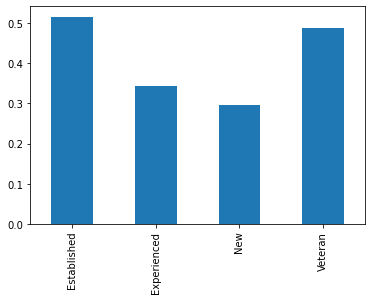

In [51]:
dissat_by_dur.plot(kind='bar', y='mean', legend=False)

This plot shows that the most dissatified employees across data sets are those who are established or veterans, with 7+ years at the institute. Employees with less than 7 years at a company show lower rates of dissatisfaction.

## Analyze dissatisfaction by age

In [52]:
dete_tafe_updated['age_int'].value_counts()

41    93
46    80
36    73
51    71
26    67
21    62
31    61
56    55
61    23
20    10
Name: age_int, dtype: int64

In [53]:
dissat_by_age = dete_tafe_updated.pivot_table(index='age_int', values='dissatisfied', aggfunc=['count', np.mean])
dissat_by_age

,count,mean
,dissatisfied,dissatisfied
age_int,,
20,10,0.200000
21,62,0.306452
26,67,0.417910
31,61,0.377049
36,73,0.342466
41,93,0.376344
46,80,0.387500
51,71,0.422535


<AxesSubplot:xlabel='age_int'>

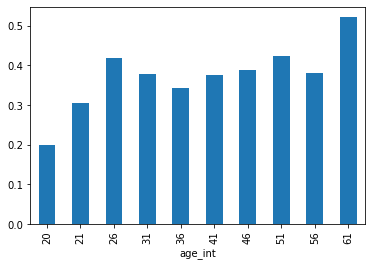

In [54]:
dissat_by_age.plot(kind='bar', y='mean', legend=False)

This plot shows that with age increase, dissatisfaction increases. The trend is not linear, but it may partially explain why veterans are more dissatisfied than new employees, as age and veteran status correlate.